In [1]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict

In [2]:
# Define State
class BMIState(TypedDict):
    height: float  # in meters variable
    weight: float  # in kilograms variable
    bmi: float     # Body Mass Index variable
    category: str  # BMI Category variable

In [3]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight'] # extracting values from state dictionary
    height = state['height'] # extracting values from state dictionary

    bmi = weight / (height ** 2)

    state['bmi'] = round(bmi , 2) # adding new key-value pair to state dictionary as Bmi where bmi will hold the calculated value
    return state 



In [4]:
def lable_bmi(state: BMIState) -> BMIState:
    bmi = state['bmi'] # extracting values from state dictionary

    if bmi < 18.5:
        category = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        category = 'Normal weight'
    elif 25 <= bmi < 29.9:
        category = 'Overweight'
    else:
        category = 'Obesity'

    state['category'] = category
    return state

In [5]:
# Define your graph
graph = StateGraph(BMIState)

# Define your nodes
graph.add_node('calculate_bmi' , calculate_bmi)  # calculate_bmi is a node and calculate_bmi is a function, bascically every node is a function
graph.add_node('lable_bmi', lable_bmi)  
# Add Edges to the graph
graph.add_edge(START , 'calculate_bmi')
graph.add_edge('calculate_bmi' , 'lable_bmi')
graph.add_edge('lable_bmi' , END) 

# Compile the graph
workflow = graph.compile()


In [8]:
# execute the graph
initial_state = {'weight': 48, 'height': 1.75}

final_state = workflow.invoke(initial_state)

print(final_state)  # Should include the calculated BMI


{'height': 1.75, 'weight': 48, 'bmi': 15.67, 'category': 'Underweight'}


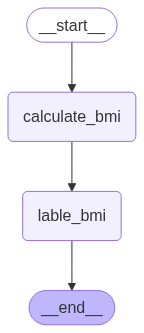

In [7]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())